In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [2]:
# import libraries
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import plotly.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go

#initiate visualization library for jupyter notebook 
#pyoff.init_notebook_mode()

tx_data = pd.read_csv('../input/onlineretail/OnlineRetail.csv', encoding= 'unicode_escape')
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Revenue

In [4]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])
tx_data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [5]:
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].apply(lambda date: 100*date.year+date.month)
tx_data['InvoiceYearMonth']

0         201012
1         201012
2         201012
3         201012
4         201012
           ...  
541904    201112
541905    201112
541906    201112
541907    201112
541908    201112
Name: InvoiceYearMonth, Length: 541909, dtype: int64

In [6]:
tx_data['Revenue'] = tx_data['Quantity']*tx_data['UnitPrice']
tx_data['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64

In [7]:
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


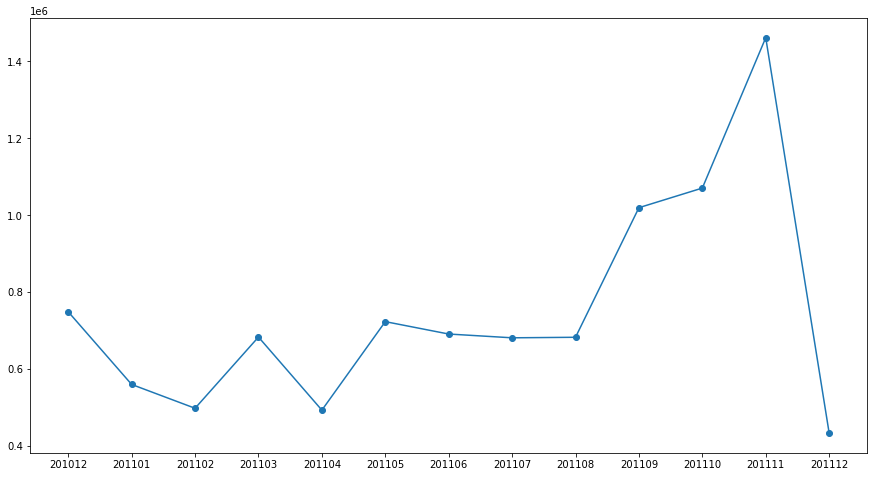

In [8]:
fig = plt.figure(figsize=(15,8))
plt.scatter(tx_revenue['InvoiceYearMonth'].astype('str'), tx_revenue['Revenue'])
plt.plot(tx_revenue['InvoiceYearMonth'].astype('str'), tx_revenue['Revenue'])
plt.show()

In [9]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


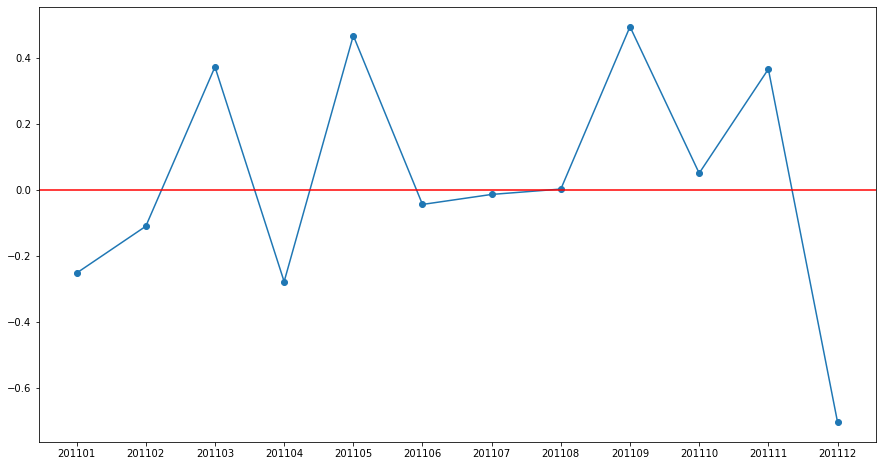

In [10]:
fig = plt.figure(figsize=(15,8))
plt.scatter(tx_revenue['InvoiceYearMonth'].astype('str'), tx_revenue['MonthlyGrowth'])
plt.plot(tx_revenue['InvoiceYearMonth'].astype('str'), tx_revenue['MonthlyGrowth'])
plt.axhline(y=0., color = 'red')
#plt.plot(tx_revenue['InvoiceYearMonth'].astype('str'), [0.0]*len(tx_revenue['MonthlyGrowth']), color = 'red')
plt.show()

In [11]:
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [12]:
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


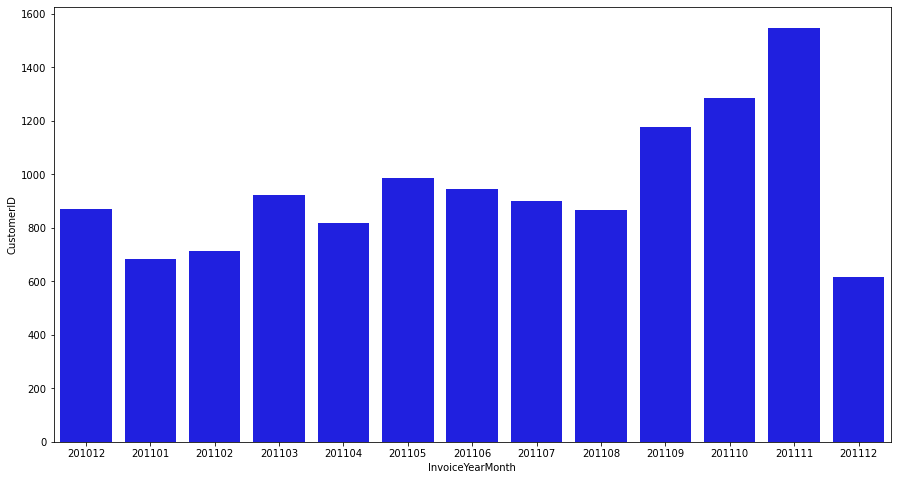

In [13]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x= tx_monthly_active['InvoiceYearMonth'].astype('str'), y=tx_monthly_active['CustomerID'], color = 'blue')
plt.show()

In [14]:
tx_monthly_sales = tx_uk.groupby(['InvoiceYearMonth'])['Quantity'].sum().reset_index()
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


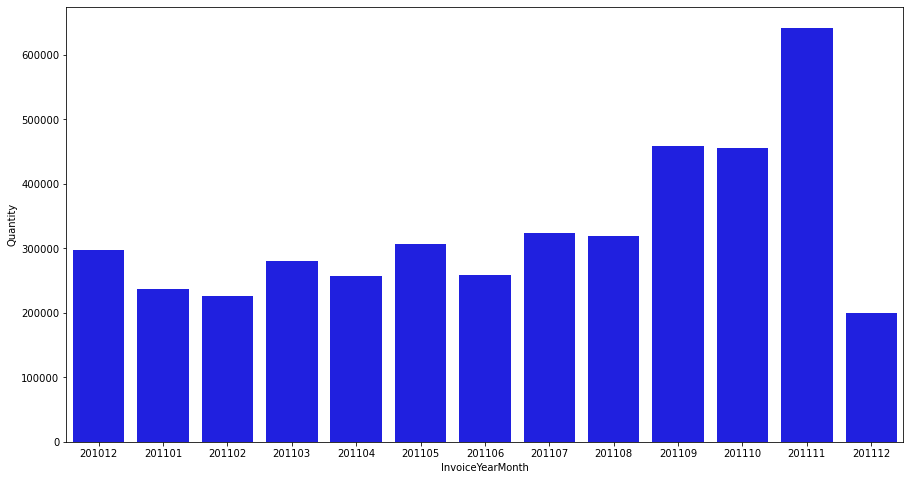

In [15]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = tx_monthly_sales['InvoiceYearMonth'], y = tx_monthly_sales['Quantity'], color = 'blue')
plt.show()

In [16]:
tx_monthly_order_average = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_average 

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


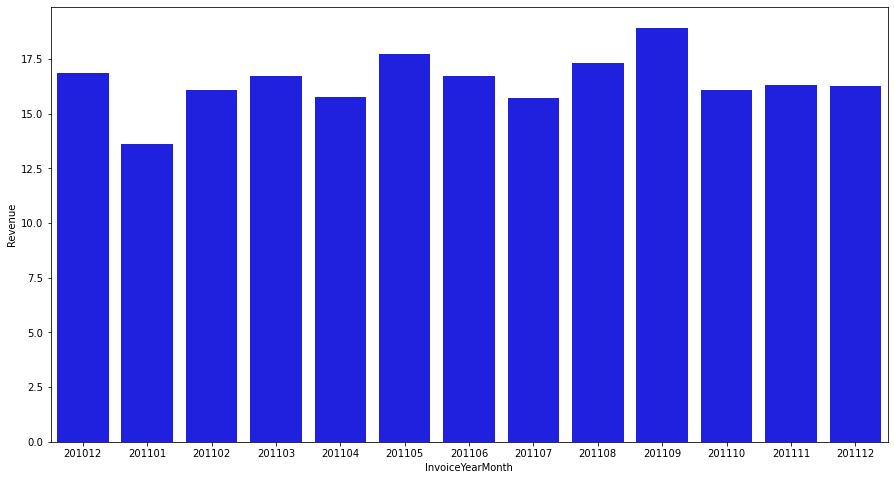

In [17]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = tx_monthly_order_average['InvoiceYearMonth'], y = tx_monthly_order_average['Revenue'], color = 'blue')
plt.show()

## New customer ratio

In [18]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [19]:
tx_min_purchase = tx_uk.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
tx_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].apply(lambda date: 100*date.year + date.month)
tx_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [20]:
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [21]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth'] > tx_uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [22]:
print('New users: {0}'.format(len(tx_uk[tx_uk['UserType'] == 'New'])))
print('Exist users: {0}'.format(len(tx_uk[tx_uk['UserType'] == 'Existing'])))

New users: 105764
Exist users: 256114


In [23]:
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


In [24]:
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


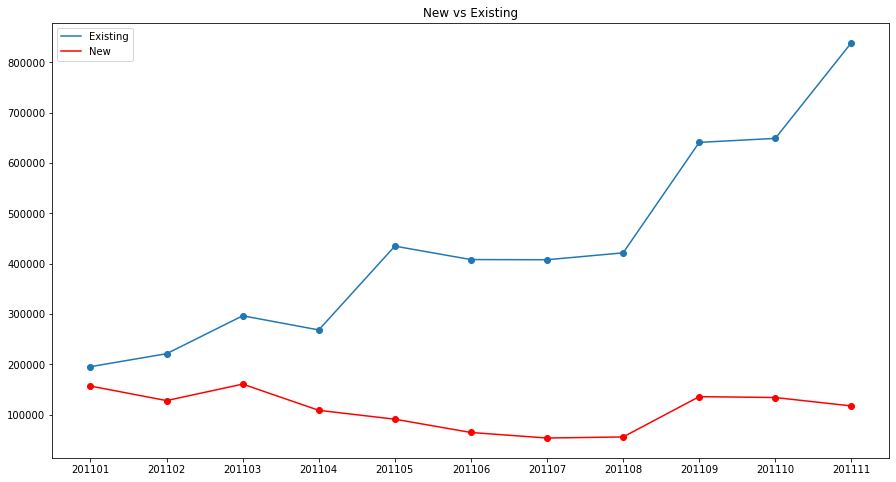

In [31]:
fig  = plt.figure(figsize = (15, 8))
plt.scatter(tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['InvoiceYearMonth'].astype('str'), tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['Revenue'])
plt.plot(tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['InvoiceYearMonth'].astype('str'), tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['Revenue'], label='Existing')
plt.scatter(tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['InvoiceYearMonth'].astype('str'), tx_user_type_revenue[tx_user_type_revenue['UserType']== 'New']['Revenue'], color = 'red')
plt.plot(tx_user_type_revenue[tx_user_type_revenue['UserType']== 'Existing']['InvoiceYearMonth'].astype('str'), tx_user_type_revenue[tx_user_type_revenue['UserType']== 'New']['Revenue'], color = 'red', label = 'New')
plt.title('New vs Existing')
plt.legend()
plt.show()

In [33]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


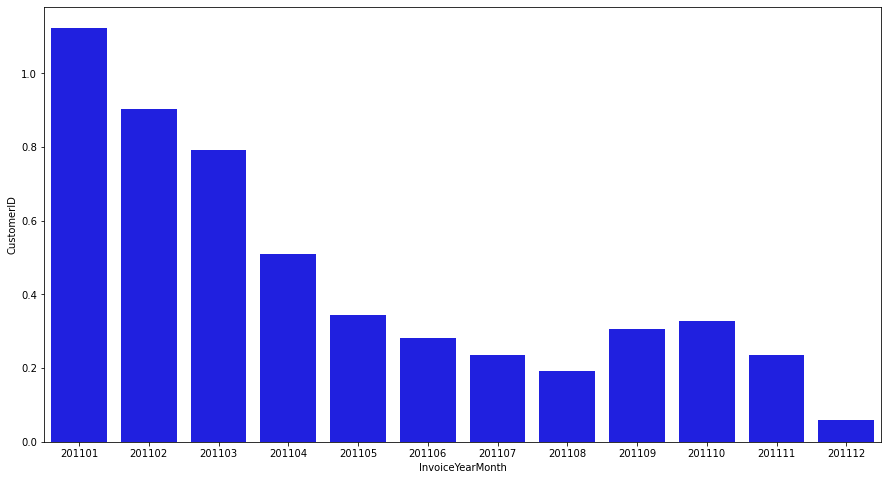

In [34]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = tx_user_ratio['InvoiceYearMonth'], y = tx_user_ratio['CustomerID'], color = 'blue')
plt.show()

## Monthly retention rate

In [35]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [36]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [37]:
months = tx_retention.columns[2:]
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [38]:
# good codes
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
retention_array    

[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263},
 {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305},
 {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310},
 {'InvoiceYearMonth': 201105, 'TotalUserCount': 985, 'RetainedUserCount': 369},
 {'InvoiceYearMonth': 201106, 'TotalUserCount': 943, 'RetainedUserCount': 417},
 {'InvoiceYearMonth': 201107, 'TotalUserCount': 899, 'RetainedUserCount': 379},
 {'InvoiceYearMonth': 201108, 'TotalUserCount': 867, 'RetainedUserCount': 391},
 {'InvoiceYearMonth': 201109,
  'TotalUserCount': 1177,
  'RetainedUserCount': 417},
 {'InvoiceYearMonth': 201110,
  'TotalUserCount': 1285,
  'RetainedUserCount': 502},
 {'InvoiceYearMonth': 201111,
  'TotalUserCount': 1548,
  'RetainedUserCount': 616},
 {'InvoiceYearMonth': 201112, 'TotalUserCount': 617, 'RetainedUserCount': 402}]

In [39]:
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


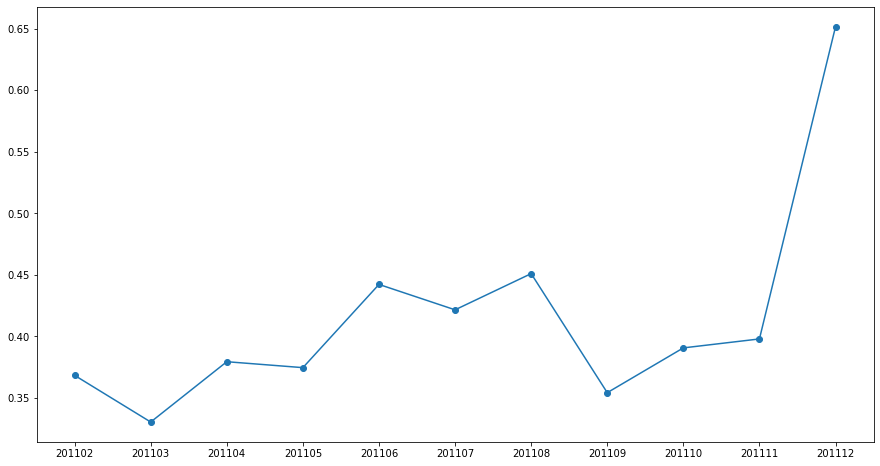

In [42]:
fig = plt.figure(figsize = (15,8))
plt.scatter(tx_retention['InvoiceYearMonth'].astype('str'), tx_retention['RetentionRate'])
plt.plot(tx_retention['InvoiceYearMonth'].astype('str'), tx_retention['RetentionRate'])
plt.show()

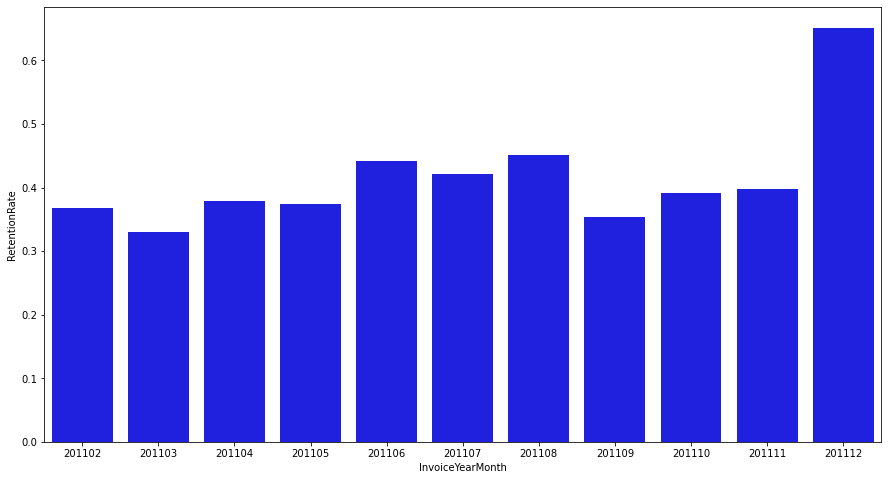

In [40]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = tx_retention['InvoiceYearMonth'], y = tx_retention['RetentionRate'], color = 'blue')
plt.show()